In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [2]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Seaborn version: 0.11.1
Matplotlib version: 3.3.4
Sklearn version: 0.24.1
Statsmodels version: 0.12.2


In [3]:
df = pd.read_csv('Sales_quantity.csv')
df.head()

,Sales_quantity
0,12729
1,11636
2,15922
3,15227
4,8620


In [4]:
Time_Stamp = pd.date_range(start='01/01/2015',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

In [5]:
df['Time_Stamp'] = Time_Stamp
df.head()

,Sales_quantity,Time_Stamp
0,12729,2015-01-31
1,11636,2015-02-28
2,15922,2015-03-31
3,15227,2015-04-30
4,8620,2015-05-31


In [6]:
df.set_index(keys='Time_Stamp',inplace=True)
df.head()

,Sales_quantity
Time_Stamp,
2015-01-31,12729
2015-02-28,11636
2015-03-31,15922
2015-04-30,15227
2015-05-31,8620


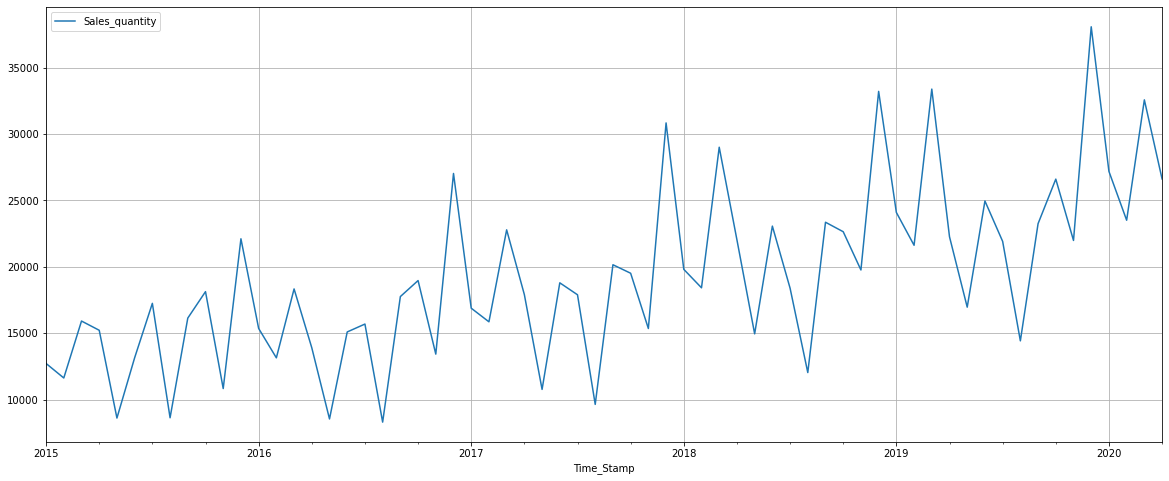

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);

In [12]:
df.describe()

,Sales_quantity
count,64.000000
mean,19197.375000
std,6591.287257
min,8314.000000
25%,15065.500000
50%,18368.000000
75%,22856.250000
max,38069.000000


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df_decompose = seasonal_decompose(df,model='additive')

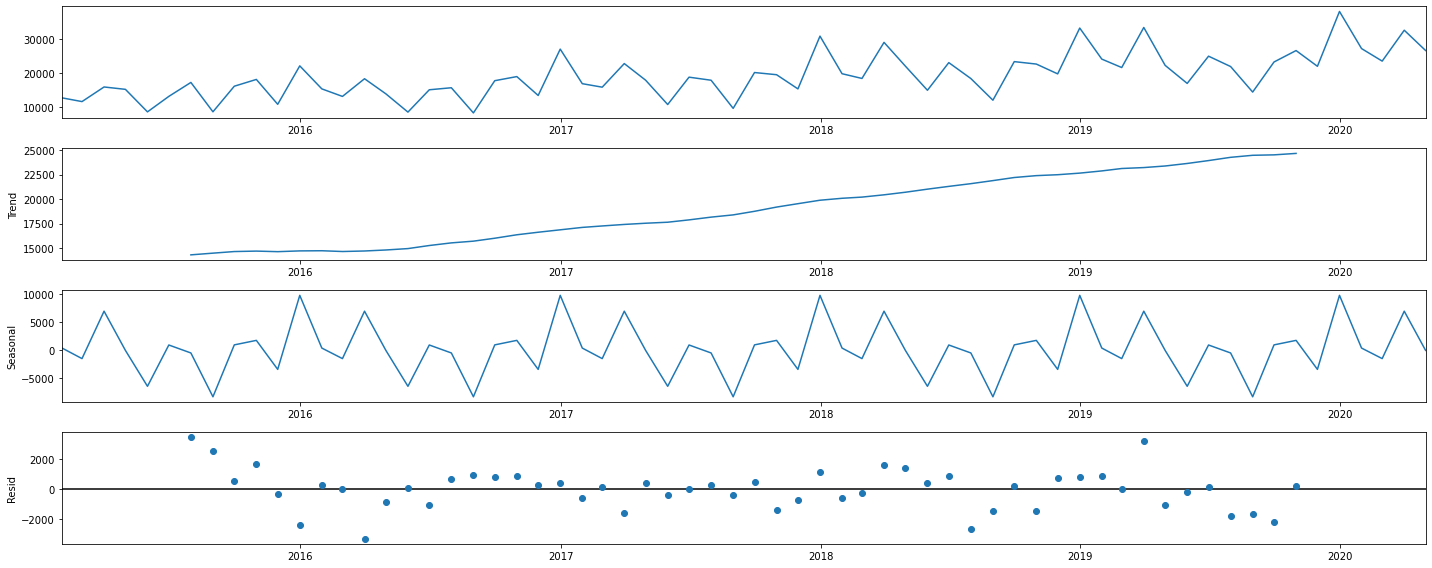

In [15]:
df_decompose.plot();

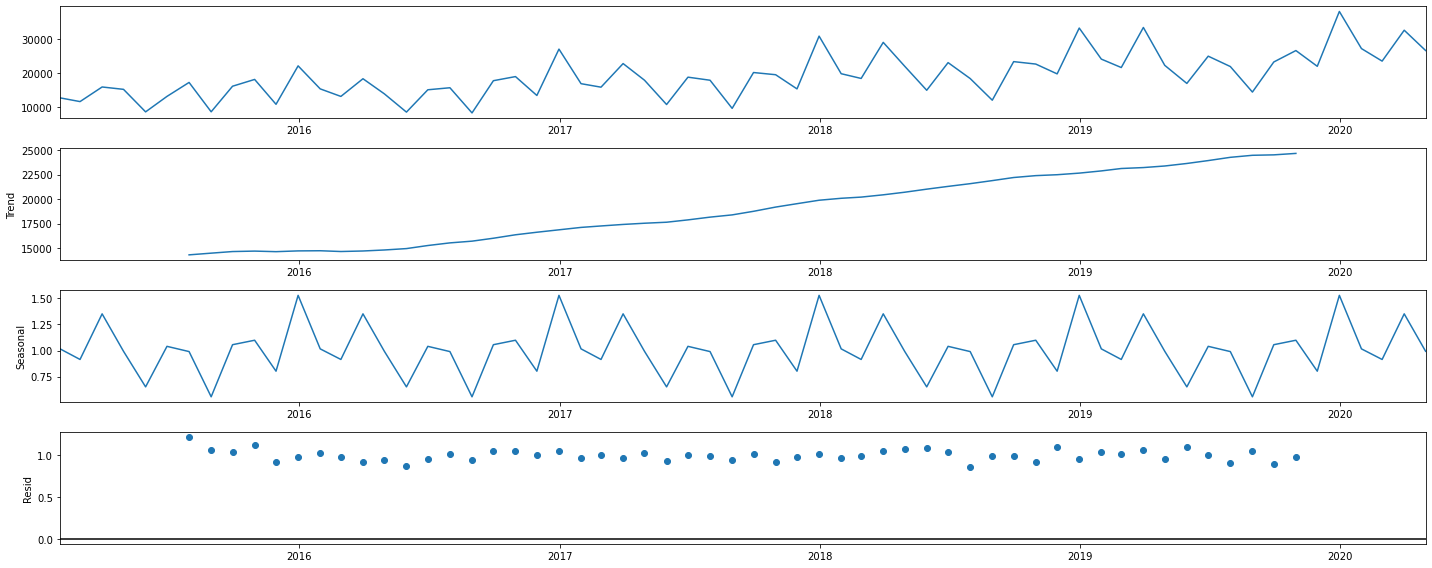

In [16]:
df_decompose = seasonal_decompose(df,model='multiplicative')
df_decompose.plot();

In [19]:
df_decompose.trend.head(12)

Time_Stamp
2015-01-31             NaN
2015-02-28             NaN
2015-03-31             NaN
2015-04-30             NaN
2015-05-31             NaN
2015-06-30             NaN
2015-07-31    14311.750000
2015-08-31    14484.791667
2015-09-30    14648.708333
2015-10-31    14694.500000
2015-11-30    14636.791667
2015-12-31    14714.875000
Name: trend, dtype: float64

In [20]:
df_decompose.seasonal.head(12)

Time_Stamp
2015-01-31    1.016014
2015-02-28    0.914684
2015-03-31    1.351165
2015-04-30    0.992906
2015-05-31    0.652248
2015-06-30    1.040221
2015-07-31    0.990120
2015-08-31    0.557343
2015-09-30    1.055952
2015-10-31    1.098610
2015-11-30    0.802419
2015-12-31    1.528319
Name: seasonal, dtype: float64

In [21]:
df_decompose.resid.head(12)

Time_Stamp
2015-01-31         NaN
2015-02-28         NaN
2015-03-31         NaN
2015-04-30         NaN
2015-05-31         NaN
2015-06-30         NaN
2015-07-31    1.217613
2015-08-31    1.070482
2015-09-30    1.043681
2015-10-31    1.123361
2015-11-30    0.923043
2015-12-31    0.983280
Name: resid, dtype: float64

### Stationarity checking using Dickey-Fuller test

H0 : The Time Series has a unit root and is thus non-stationary.
<br> H1 : The Time Series does not have a unit root and is thus stationary.

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
dftest = adfuller(df,regression="ct")

In [24]:
print('DF test statistic is %0.2f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.53
DF test p-value is 0.312607127780437
Number of lags used 11


Because p-value is more than 0.05 so we failed to reject the NULL hypothesis means time series is non stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [25]:
dftest = adfuller(df.diff().dropna(),regression="ct")

In [26]:
print('DF test statistic is %0.2f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.27
DF test p-value is 9.130089570108654e-14
Number of lags used 10


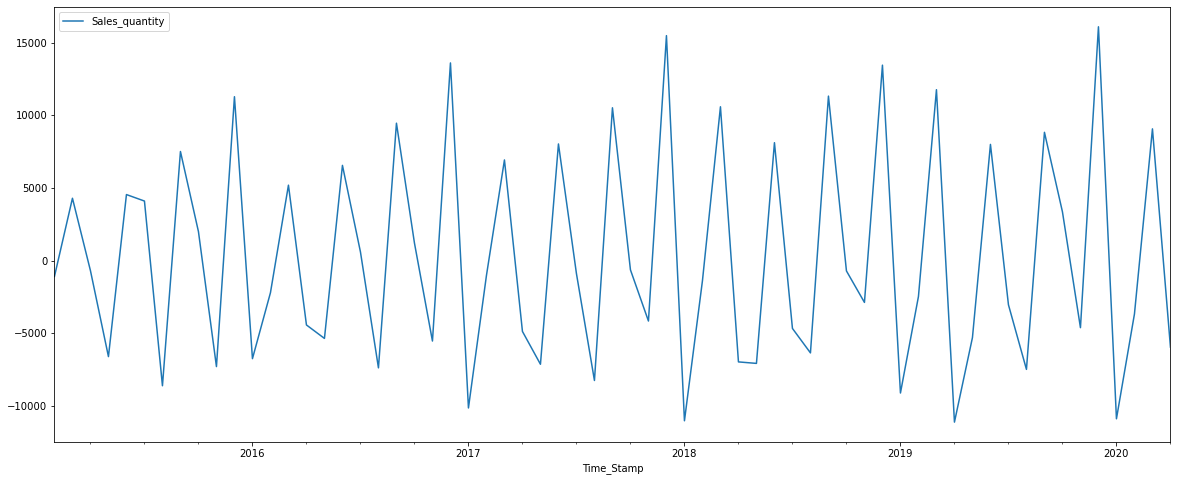

In [27]:
df.diff().dropna().plot();

### Plot the autocorrelation and partial autocorrelation plots

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

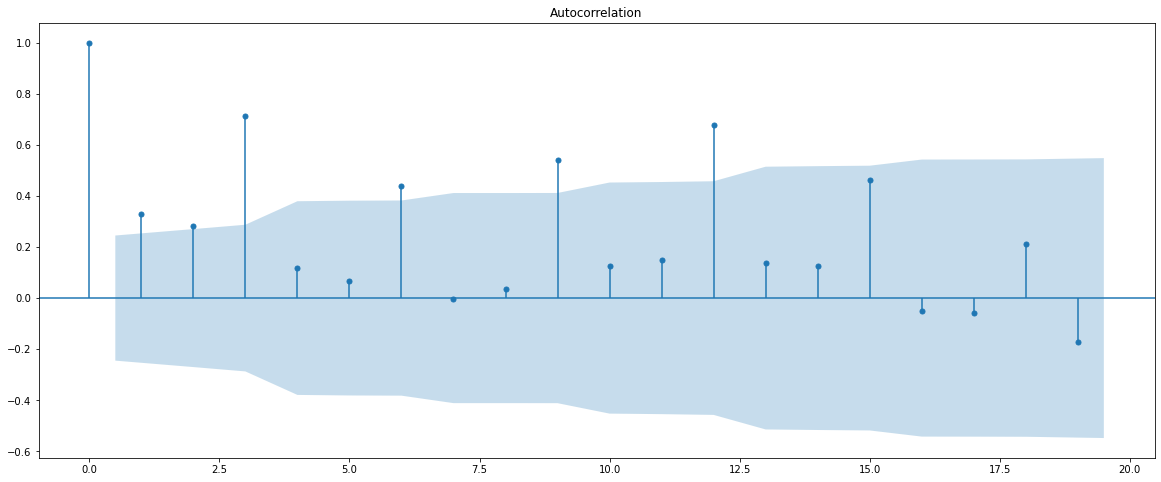

In [30]:
plot_acf(df);

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


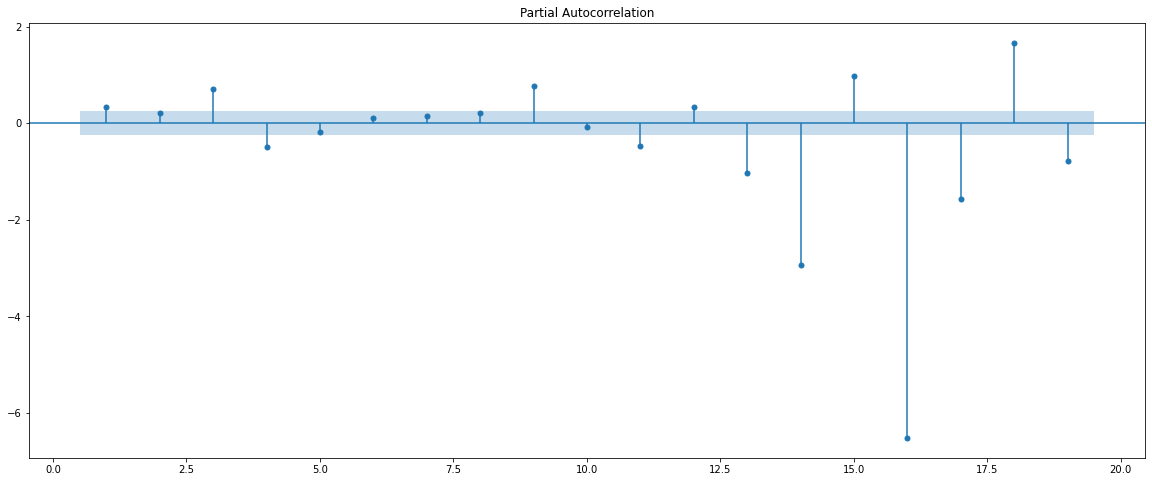

In [33]:
plot_pacf(df,zero=False);

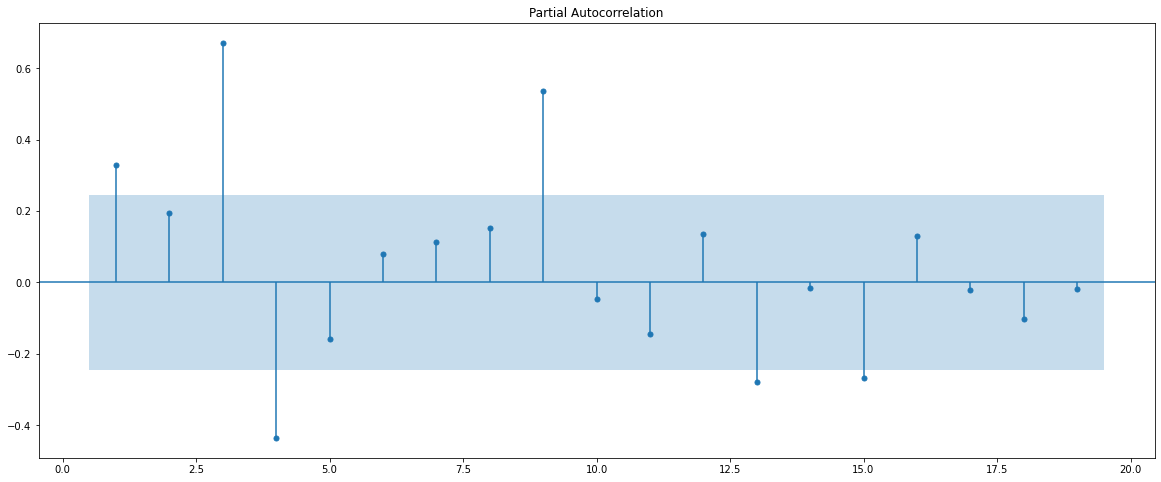

In [34]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

### Splitting the data into training and test set

In [40]:
df.index.year.unique()

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Time_Stamp')

In [41]:
train = df[df.index<='2019']
test = df[df.index>'2019']

In [45]:
print('First few rows of train dataset')
print(train.head())
print('Last few rows of train dataset')
print(train.tail())
print('First few rows of test dataset')
print(test.head())
print('Last few rows of test dataset')
print(test.tail())

First few rows of train dataset
            Sales_quantity
Time_Stamp                
2015-01-31           12729
2015-02-28           11636
2015-03-31           15922
2015-04-30           15227
2015-05-31            8620
Last few rows of train dataset
            Sales_quantity
Time_Stamp                
2018-08-31           12045
2018-09-30           23358
2018-10-31           22644
2018-11-30           19765
2018-12-31           33207
First few rows of test dataset
            Sales_quantity
Time_Stamp                
2019-01-31           24096
2019-02-28           21624
2019-03-31           33379
2019-04-30           22265
2019-05-31           16967
Last few rows of test dataset
            Sales_quantity
Time_Stamp                
2019-12-31           38069
2020-01-31           27184
2020-02-29           23509
2020-03-31           32569
2020-04-30           26615


In [46]:
print(train.shape)
print(test.shape)

(48, 1)
(16, 1)


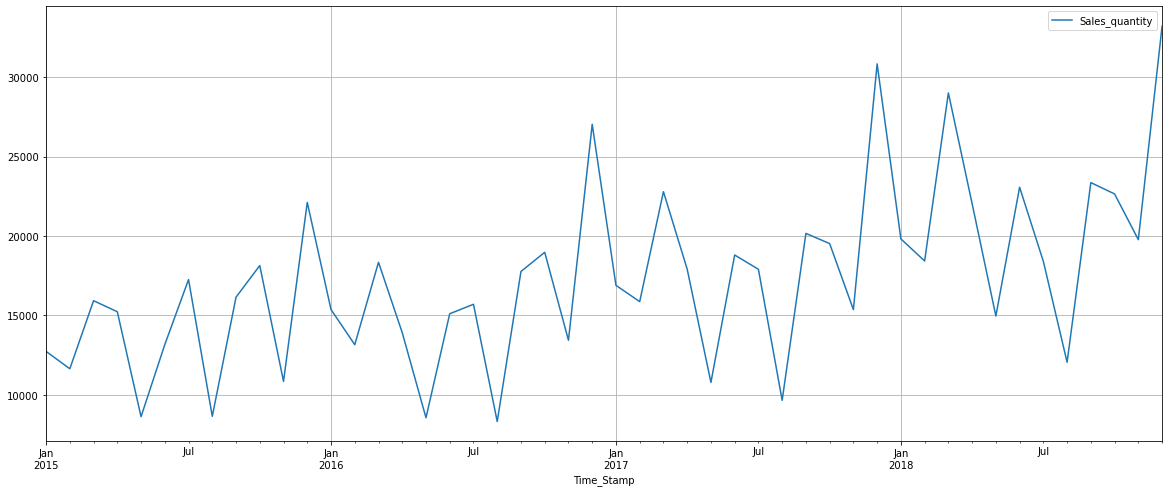

In [47]:
#plot the train data
train.plot(grid=True);

In [48]:
dftest = adfuller(train,regression="ct")
print('train statistic is %0.2f' %dftest[0])
print('train p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

train statistic is -1.42
train p-value is 0.8553111705791601
Number of lags used 10


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [49]:
dftest = adfuller(train.diff().dropna(),regression="ct")
print('train statistic is %0.2f' %dftest[0])
print('train p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

train statistic is -10.82
train p-value is 4.9223220486532713e-17
Number of lags used 10


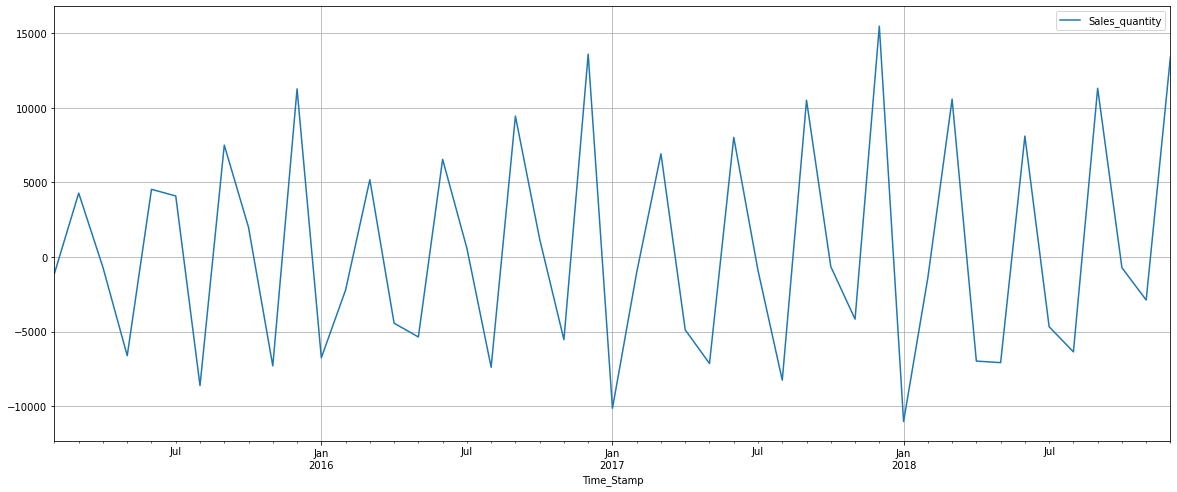

In [50]:
#Now, let us go ahead and plot the differenced training data.
train.diff().dropna().plot(grid=True);

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sales_quantity  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


### Building automated ARIMA version

In [52]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [53]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [54]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sales_quantity'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:970.5800792205061
ARIMA(0, 1, 1) - AIC:946.3747183841473
ARIMA(0, 1, 2) - AIC:938.9401325652516
ARIMA(0, 1, 3) - AIC:936.7086994131739
ARIMA(1, 1, 0) - AIC:960.054023108071
ARIMA(1, 1, 1) - AIC:947.2909679438254


C:\Users\dines\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) - AIC:946.6935728826827
ARIMA(1, 1, 3) - AIC:934.564191761015
ARIMA(2, 1, 0) - AIC:927.6243792519236
ARIMA(2, 1, 1) - AIC:924.6612101403742
ARIMA(2, 1, 2) - AIC:912.7956223396401
ARIMA(2, 1, 3) - AIC:917.4649014534577
ARIMA(3, 1, 0) - AIC:922.496739993919
ARIMA(3, 1, 1) - AIC:924.4464860408016
ARIMA(3, 1, 2) - AIC:916.9388174513862


C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:916.0052408409878


In [55]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",912.795622
15,"(3, 1, 3)",916.005241
14,"(3, 1, 2)",916.938817
11,"(2, 1, 3)",917.464901
12,"(3, 1, 0)",922.496740


In [56]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -451.398
Date:                Sat, 29 Jan 2022   AIC                            912.796
Time:                        17:49:10   BIC                            922.046
Sample:                    01-31-2015   HQIC                           916.277
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9869      0.035    -28.118      0.000      -1.056      -0.918
ar.L2         -0.9671      0.023    -41.201      0.000      -1.013      -0.921
ma.L1          0.6901      0.131      5.282      0.0

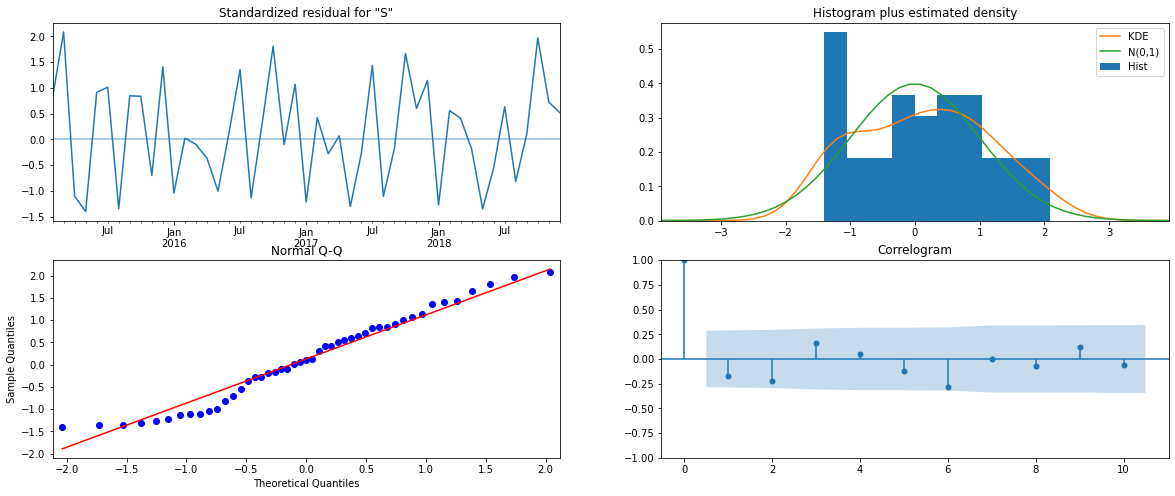

In [57]:
results_auto_ARIMA.plot_diagnostics();

In [58]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [59]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [60]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4400.537139357595 
MAPE: 14.606968400300582


In [61]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968


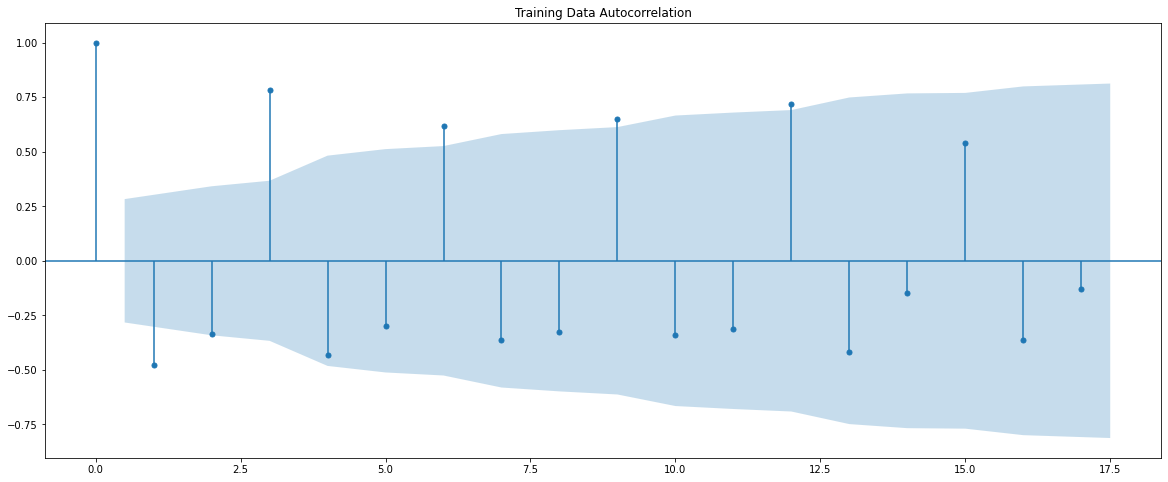

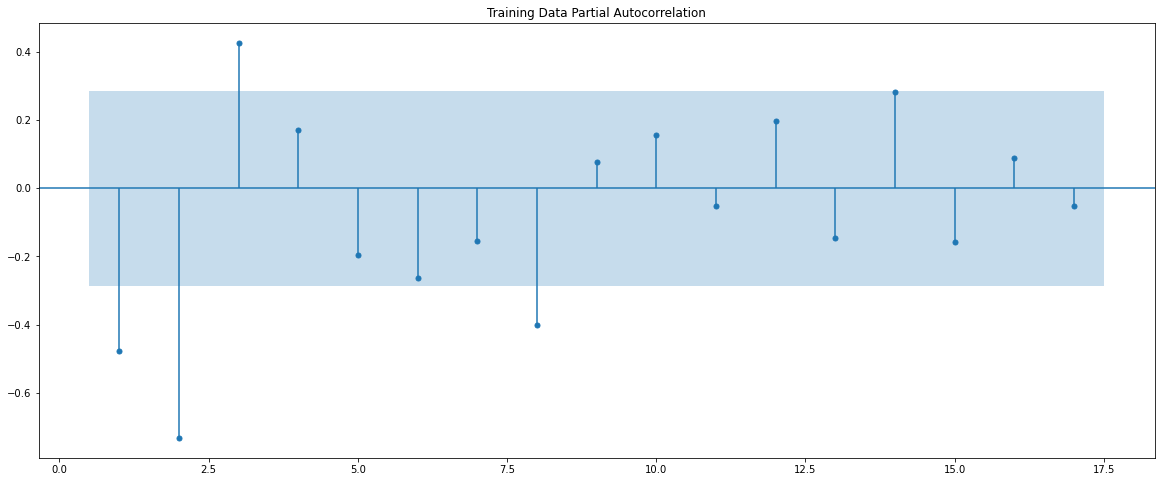

In [62]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.
By looking at the above plots, we will take the value of p and q to be 3 and 3 respectively.

In [63]:
manual_ARIMA = ARIMA(train['Sales_quantity'], order=(3,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   48
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -451.003
Date:                Sat, 29 Jan 2022   AIC                            916.005
Time:                        17:56:39   BIC                            928.956
Sample:                    01-31-2015   HQIC                           920.879
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3015      0.355     -0.850      0.395      -0.997       0.394
ar.L2         -0.2919      0.338     -0.863      0.388      -0.955       0.371
ar.L3          0.6602      0.344      1.918      0.0

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


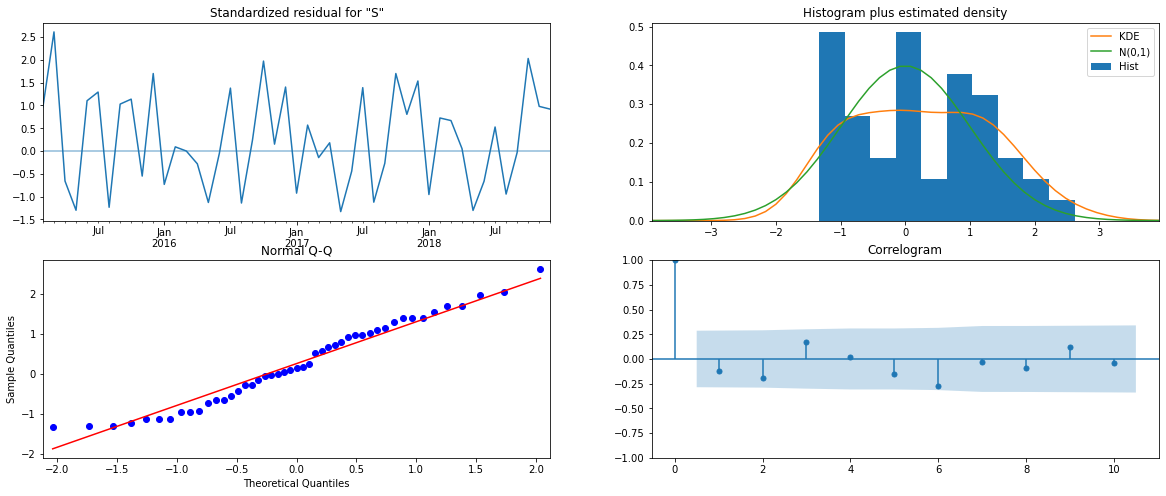

In [64]:
results_manual_ARIMA.plot_diagnostics();

In [65]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [66]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4091.911987324296 
MAPE: 14.384778655265801


In [67]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968
"ARIMA(3,1,3)",4091.911987,14.384779


### Building automated SARIMA version

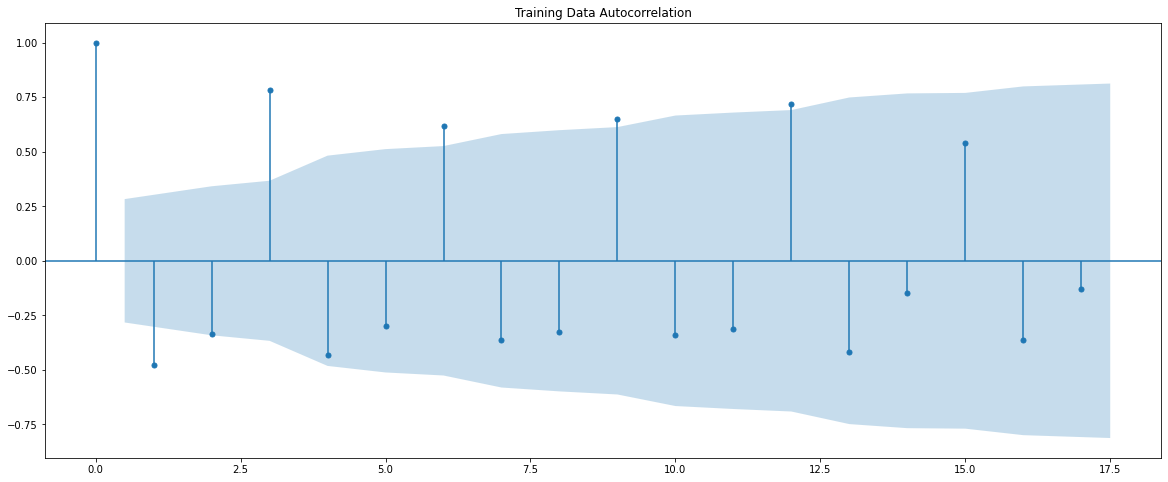

In [68]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We see seasonality

In [69]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [71]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [72]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales_quantity'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:950.9698819117601
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:824.6387628791792


C:\Users\dines\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1405.0052693014372
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:566.0463827837618
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:826.8368008474987
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:796.0758231748734
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:657.0853263038941
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:523.8434054742415
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:627.0035938265593
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:626.5860152586523
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:612.0998480423189
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:500.1786582209929
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:514.6367326495093
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:511.53226449686065
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:513.3053667110651
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:495.1762340525424
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:910.6959030043946
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:791.9136892949963
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1333.0298805834705
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:546.1317843089903
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:829.0266

SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:479.5558935454928
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:482.0258471501098
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:483.88351121228146
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:847.5617616999649
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:725.0021285449415
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1323.01081055363
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:497.0652996770083
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:733.8170315354155
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:713.5993860100939
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:601.2929518092457
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:493.4182578160231
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:575.7259580175614
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:590.1732375904841
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:567.4068135828336
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:466.7468329134562
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:482.19847553598225
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:478.0140882728267
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:483.91164322738524
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:463.98259

In [73]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
59,"(0, 1, 3)","(2, 0, 3, 6)",443.880540
251,"(3, 1, 3)","(2, 0, 3, 6)",444.687703
123,"(1, 1, 3)","(2, 0, 3, 6)",445.258531
127,"(1, 1, 3)","(3, 0, 3, 6)",445.504367
255,"(3, 1, 3)","(3, 0, 3, 6)",446.014040


In [74]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(0, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -212.940
Date:                           Sat, 29 Jan 2022   AIC                            443.881
Time:                                   18:40:00   BIC                            454.850
Sample:                               01-31-2015   HQIC                           446.923
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         24.8853   1843.118      0.014      0.989   -3587.559    3637.330
ma.L2        108.9397   8066.304      0.014

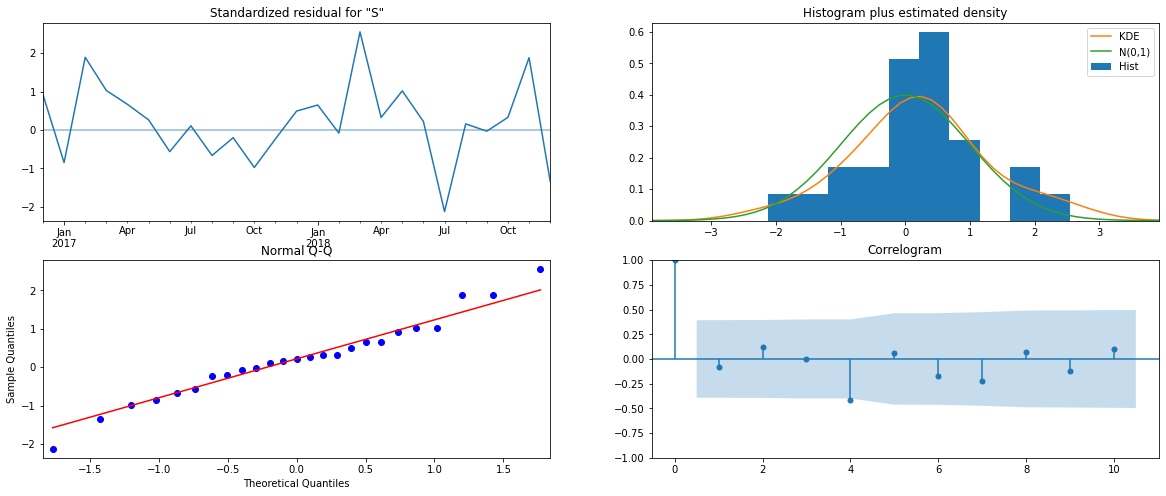

In [75]:
results_auto_SARIMA.plot_diagnostics();

In [76]:
#Predict
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [77]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-01-31,23089.809463,1121.632208,20891.450732,25288.168194
2019-02-28,20814.557564,1147.979040,18564.559990,23064.555138
2019-03-31,33200.521771,1148.749025,30949.015054,35452.028488
2019-04-30,25430.585823,1149.310421,23177.978791,27683.192854
2019-05-31,17829.923123,1149.305634,15577.325473,20082.520773


In [78]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2119.1731082329347 
MAPE: 6.41576548449698


In [79]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(0,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968
"ARIMA(3,1,3)",4091.911987,14.384779
"SARIMA(0,1,3)(2,0,3,6)",2119.173108,6.415765


In [80]:
#Manual SARIMA
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -229.624
Date:                           Sat, 29 Jan 2022   AIC                            479.249
Time:                                   18:46:32   BIC                            491.437
Sample:                               01-31-2015   HQIC                           482.629
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4033      2.528     -0.160      0.873      -5.358       4.552
ar.L2         -0.3966      2.539     -0.156

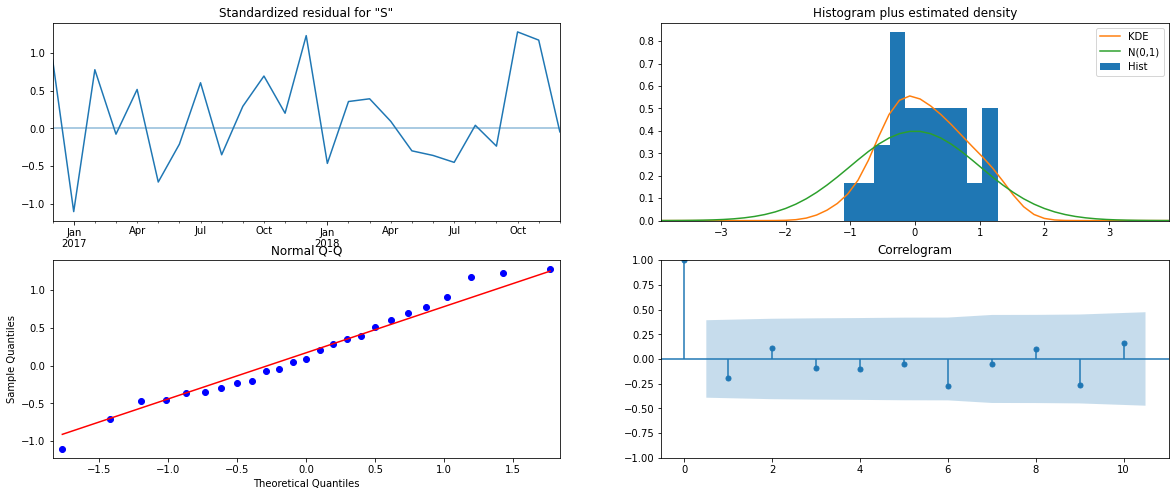

In [81]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [82]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [83]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2870.53843154957 
MAPE: 9.367992342702482


In [84]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968
"ARIMA(3,1,3)",4091.911987,14.384779
"SARIMA(0,1,3)(2,0,3,6)",2119.173108,6.415765
"SARIMA(3,1,3)(0,0,3,6)",2870.538432,9.367992


### Building the most optimum model on the Full Data.

In [85]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sales_quantity'],
                                order=(0,1,3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -358.711
Date:                           Sat, 29 Jan 2022   AIC                            735.422
Time:                                   18:48:37   BIC                            750.845
Sample:                               01-31-2015   HQIC                           741.038
                                    - 04-30-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9255      0.304     -3.048      0.002      -1.521      -0.330
ma.L2          0.0574      0.326      0.176

In [86]:
# Predict 20 months into future

In [87]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [88]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-05-31,19255.747538,1497.646834,16320.413682,22191.081394
2020-06-30,27606.136926,1503.890361,24658.565981,30553.707871
2020-07-31,24948.606797,1520.675560,21968.137468,27929.076126
2020-08-31,16627.363426,1520.687564,13646.870569,19607.856283
2020-09-30,25077.535363,1520.708385,22097.001698,28058.069028


In [89]:
rmse = mean_squared_error(df['Sales_quantity'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 3207.7863303597283


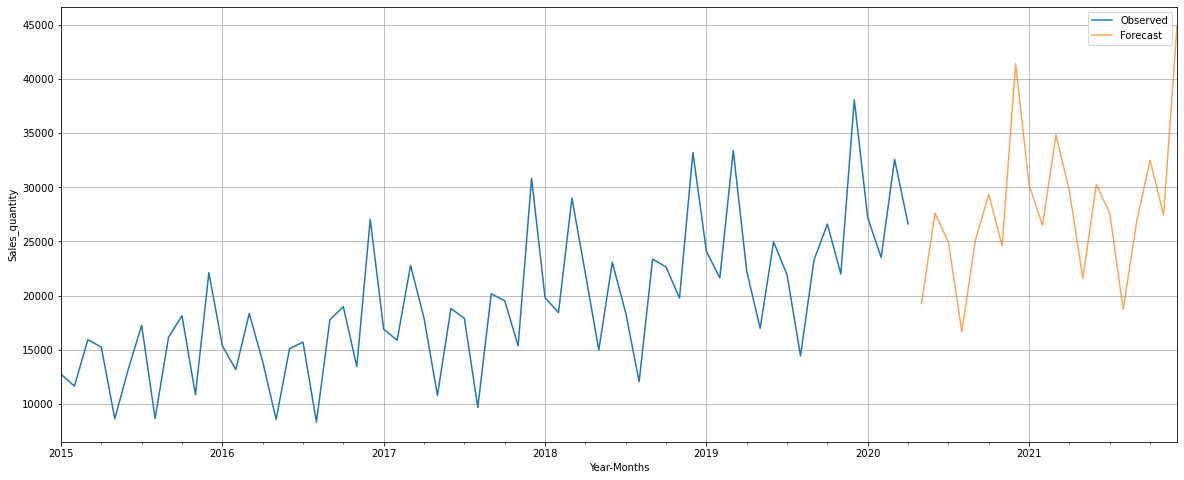

In [90]:
axis = df['Sales_quantity'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();